#Step 1:

##Defining Problem Statement:


###Problem Statement Introduction:

Yulu, India's pioneering micro-mobility service provider, has been revolutionizing daily commutes with sustainable transportation solutions since its founding in 2017. Despite their mission to promote green mobility through e-scooters and e-bikes, recent revenue setbacks have prompted Yulu to seek expert consultation. They aim to identify and analyze the factors influencing the demand for their shared electric cycles in the Indian market.

Yulu's dockless rides, accessible through an app, are scattered across major Indian cities like Bengaluru, Mumbai, and Delhi, offering convenience and promoting eco-friendly urban transportation. With over 25,000 rides and millions of users, Yulu has not only impacted urban commutes but also boosted local economies by creating jobs and supporting businesses.

###Business Problem:

Yulu faces a strategic challenge in understanding and predicting the demand for their shared electric cycles in the Indian market. This case study aims to address the following key questions:

● Which variables are significant in predicting the demand for shared electric cycles in the Indian market?


● How well those variables describe the electric cycle demands.


By answering these questions, Yulu seeks to tailor their services and strategies to regain profitability and expand their market presence effectively. For learners, this case study offers a real-world problem-solving opportunity to apply machine learning and data analysis techniques, gain market insights, and develop consulting skills.

##Importing Required libraries and Dataset.

In [ ]:
#Importing Equired Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading Dataset.
df=pd.read_csv("/content/bike_sharing.csv")

##Performing Exploratory Data Analysis.


####a. Examine dataset structure, characteristics, and statistical summary

In [ ]:
# Displaying the first five rows of the dataset.
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Checking shape of the dataset.
df.shape

(10886, 12)

Insights:

The dataset contains 10,886 rows and 12 columns.

In [ ]:
#Displaying all columns in the dataset.
print(df.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [ ]:
#Checking datatypes for each columns.
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Insights:

*  The "datetime" column is currently in object datatype.
*  The columns "season", "holiday", "workingday", "weather", "humidity","casual", "registered", and "count" are of integer datatype.
*   The columns "temp", "atemp", and "windspeed" are of float datatype.





Data Type need to be convert

* Need to convert data type of 'datetime' column in datetime format.

In [ ]:
# Parsing datetime column.
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
#Checking all Summary statistics.
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


####b. Identify missing values.

In [ ]:
#Identifying missing values.
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Insights:

There are no missing values in the dataset.

####C. Identify missing values.

In [ ]:
#Identifying and duplicate records.
df.duplicated().value_counts()

False    10886
Name: count, dtype: int64

Insights:

The dataset does not contain any duplicate entries.

In [ ]:
#making a copy of dataset.
df_copy=df.copy()

####d. Analyze the distribution of Numerical & Categorical variables, separately

'season' column's datatype should be in object format as they are categorical in nature

In [ ]:
#Replacing season with appropriate values.
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,spring,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,spring,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,spring,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,spring,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,spring,0,0,1,13.12,17.425,76,0.0000,8,6,14


'weather' column's datatype should be in object format as they are categorical in nature

In [ ]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
#Replacing weather with appropriate values.
df['weather'].replace({1:"Clear,Few_cloud", 2:"Mist+Cloudy,Mist+Few_clouds", 3:'Light_Snow,Light_Rain', 4:'Heavy_Rain,Snow+Fog'},inplace=True)
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,"Clear,Few_cloud",9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,0,0,"Clear,Few_cloud",9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,0,0,"Clear,Few_cloud",9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,0,0,"Clear,Few_cloud",9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,0,0,"Clear,Few_cloud",9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,spring,0,0,"Mist+Cloudy,Mist+Few_clouds",9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,spring,0,0,"Clear,Few_cloud",9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,spring,0,0,"Clear,Few_cloud",8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,spring,0,0,"Clear,Few_cloud",9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,spring,0,0,"Clear,Few_cloud",13.12,17.425,76,0.0000,8,6,14


In [ ]:
#Checking for datatypes.
df.dtypes

datetime      datetime64[ns]
season                object
holiday                int64
workingday             int64
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

'holiday' and 'workingday' column's datatype should be in object format as they are categorical in nature

In [ ]:
#Changing of datatype of columns 'holiday' and 'workingday' from numerical to object. As these are actually fall into categorical columns.
df[['holiday','workingday']]=df[['holiday','workingday']].astype('object')

In [ ]:
# Checking the structure of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,"Clear,Few_cloud",9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,0,0,"Clear,Few_cloud",9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,0,0,"Clear,Few_cloud",9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,0,0,"Clear,Few_cloud",9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,0,0,"Clear,Few_cloud",9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,spring,0,0,"Mist+Cloudy,Mist+Few_clouds",9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,spring,0,0,"Clear,Few_cloud",9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,spring,0,0,"Clear,Few_cloud",8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,spring,0,0,"Clear,Few_cloud",9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,spring,0,0,"Clear,Few_cloud",13.12,17.425,76,0.0000,8,6,14


In [ ]:
# Analyzing numerical features.
numerical_data = df.dtypes[df.dtypes !='object'].index
print(numerical_data)

Index(['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')


In [ ]:
#Droping columns 'casual','registered','count' and 'datetime'.
numerical_data= numerical_data.drop(['casual','registered','count',"datetime"])

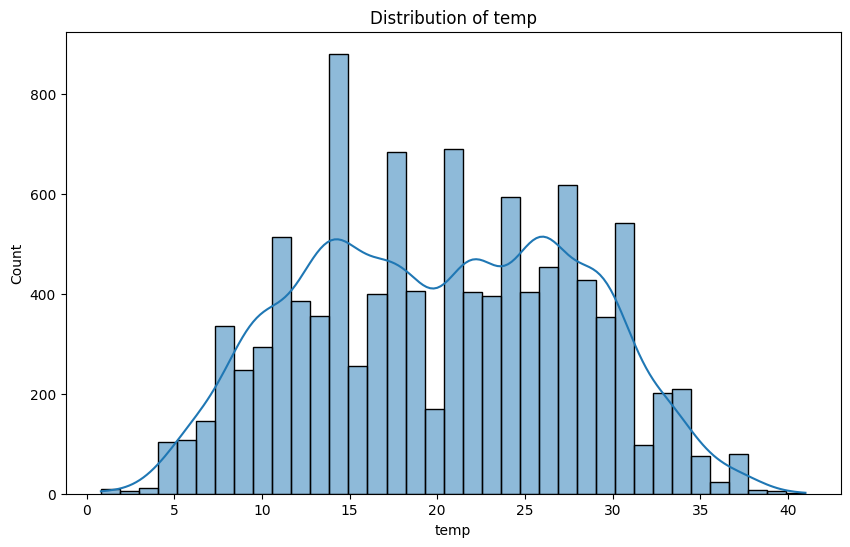

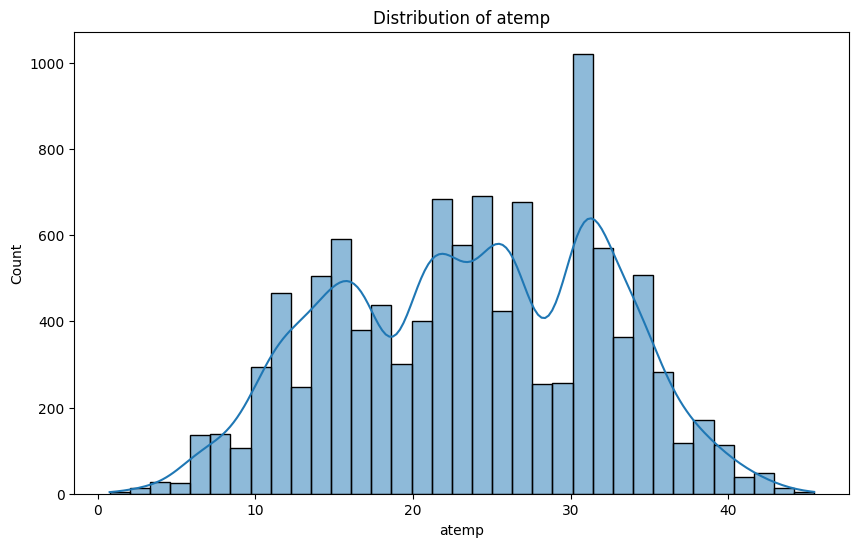

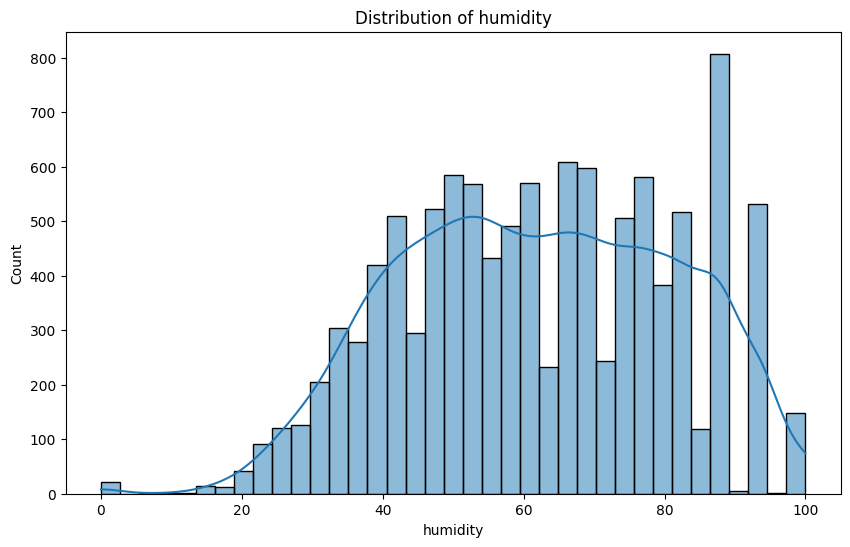

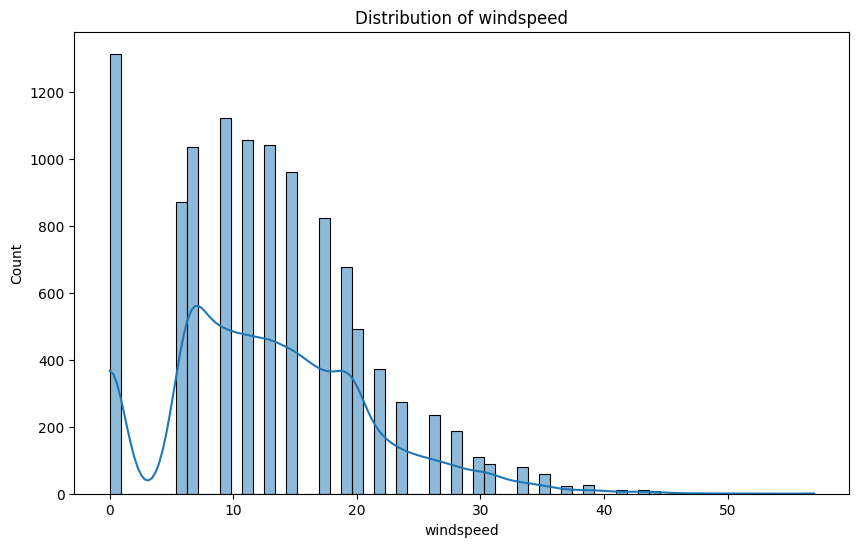

In [ ]:
# Plot histograms for numerical features
for i in numerical_data:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

Insight:
From the histograms of the numerical features, it is evident that none of these features follow a normal distribution.

In [ ]:
# Analyzing categorical features.
categorical_data=df.dtypes[df.dtypes=='object'].index
print(categorical_data)

Index(['season', 'holiday', 'workingday', 'weather'], dtype='object')


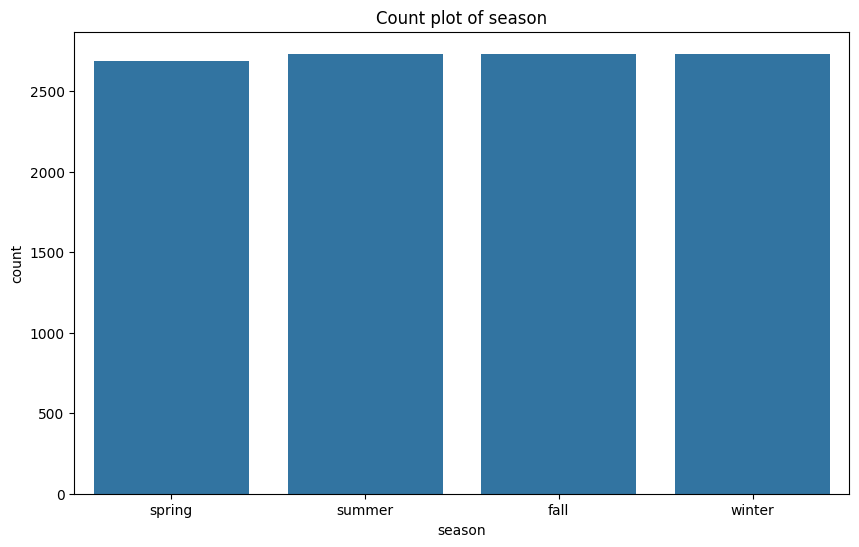

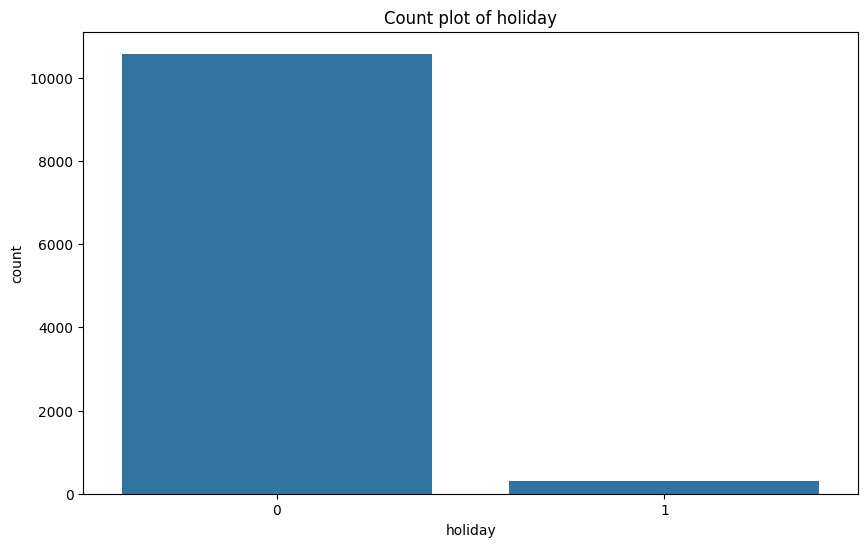

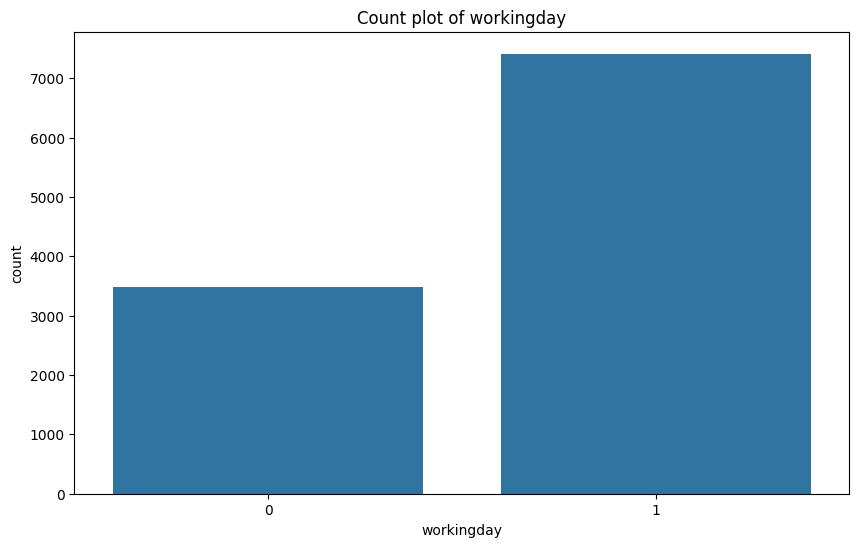

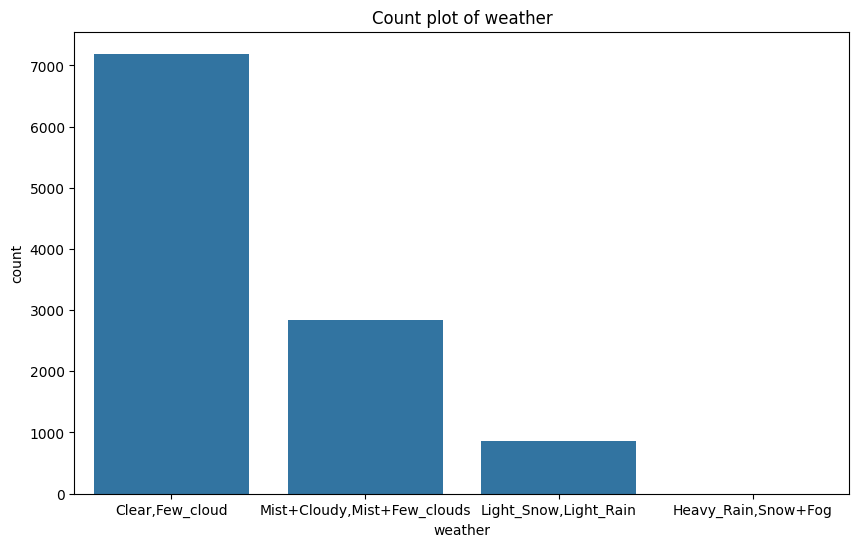

In [ ]:
# Plot countplots for categorical features
for i in categorical_data:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[i])
    plt.title(f'Count plot of {i}')
    plt.show()

Insight:

From the count plots of the categorical features, we observe the following:

*  Weather Condition: 'Clear or few cloud wheather group has the highest frequency, followed by 'Mist+Cloudy and few clouds' and Light_Snow, Light_Rain whether group. 'Heavy_Rain,Snow+Fog' weather group has only one entry in the entire dataset.
*  Working Day: The count of working days is higher compared to non-working days.
*  Season: All seasons have almost equal counts in the dataset.








####e. Check for Outliers and deal with them accordingly.

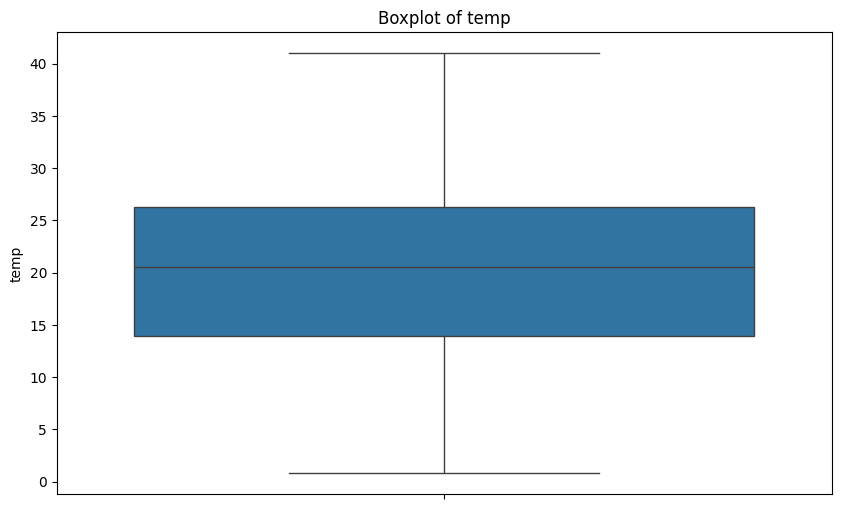

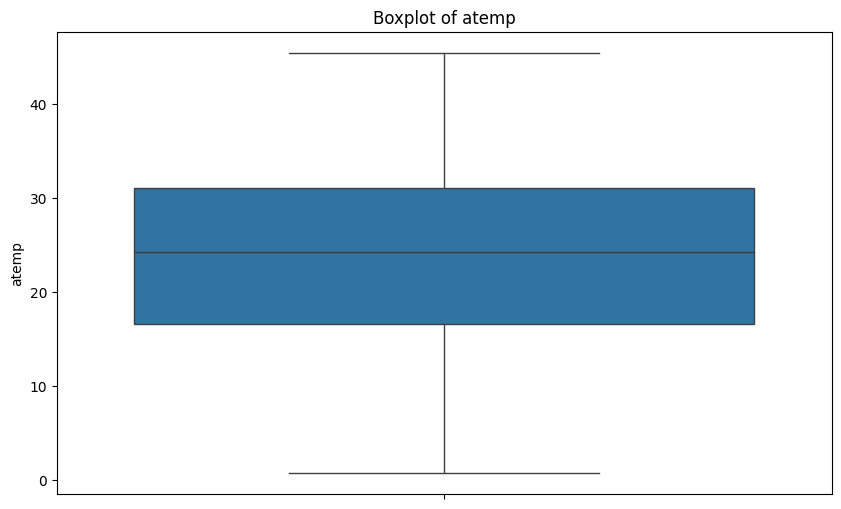

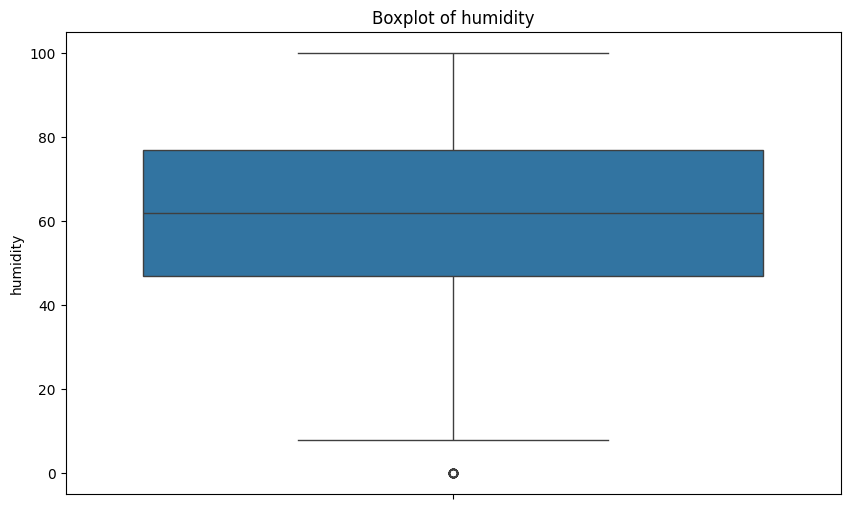

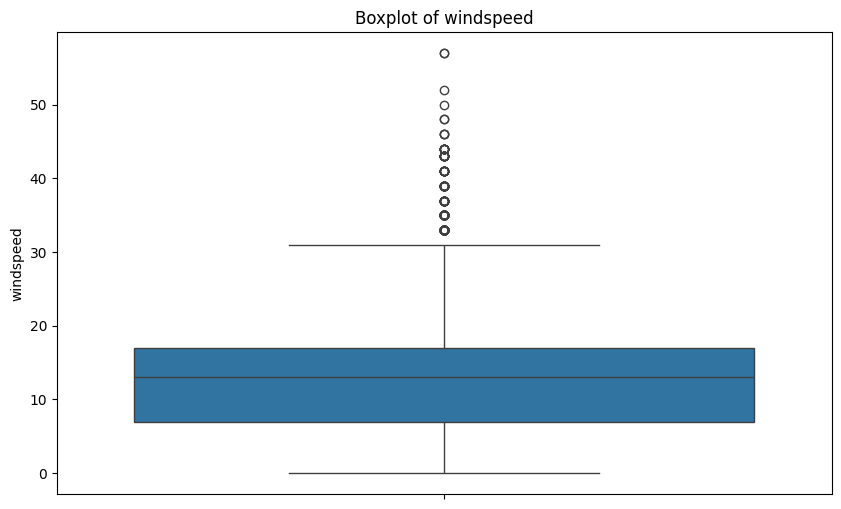

In [ ]:
#Checking for outliers using boxplot
for i in numerical_data:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [ ]:
# Handling outliers in 'humidity' column using IQR.
Q1 = df["humidity"].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1
print(Q1," ",Q3," ",IQR)
lower_bound_humidity = Q1 - 1.5 * IQR
upper_bound_humidity = Q3 + 1.5 * IQR

47.0   77.0   30.0


In [ ]:
# Handling outliers in 'windspeed' column using IQR.
Q1 = df["windspeed"].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1
print(Q1," ",Q3," ",IQR)
lower_bound_windspeed = Q1 - 1.5 * IQR
upper_bound_windspeed = Q3 + 1.5 * IQR

7.0015   16.9979   9.996400000000001


In [ ]:
#Removing outliers from dataset.
df = df[(df["windspeed"] >= lower_bound_windspeed) & (df['windspeed'] <= upper_bound_windspeed)]
df = df[(df["humidity"] >= lower_bound_humidity) & (df['humidity'] <= upper_bound_humidity)]

In [ ]:
df.shape

(10638, 12)

In [ ]:
print(df)

                 datetime  season holiday workingday          weather   temp  \
0     2011-01-01 00:00:00  spring       0          0  Clear,Few_cloud   9.84   
1     2011-01-01 01:00:00  spring       0          0  Clear,Few_cloud   9.02   
2     2011-01-01 02:00:00  spring       0          0  Clear,Few_cloud   9.02   
3     2011-01-01 03:00:00  spring       0          0  Clear,Few_cloud   9.84   
4     2011-01-01 04:00:00  spring       0          0  Clear,Few_cloud   9.84   
...                   ...     ...     ...        ...              ...    ...   
10881 2012-12-19 19:00:00  winter       0          1  Clear,Few_cloud  15.58   
10882 2012-12-19 20:00:00  winter       0          1  Clear,Few_cloud  14.76   
10883 2012-12-19 21:00:00  winter       0          1  Clear,Few_cloud  13.94   
10884 2012-12-19 22:00:00  winter       0          1  Clear,Few_cloud  13.94   
10885 2012-12-19 23:00:00  winter       0          1  Clear,Few_cloud  13.12   

        atemp  humidity  windspeed  cas

Insights:

After removing outliers from the 'humidity' and 'windspeed' columns, the filtered data consists of 10,638 entries

##Step 2: Try establishing a Relationship between the Dependent and Independent Variables.

####i. Plot a Correlation Heatmap and draw insights.

In [ ]:
# Correlation matrix

corr_matrix = df_copy.corr()

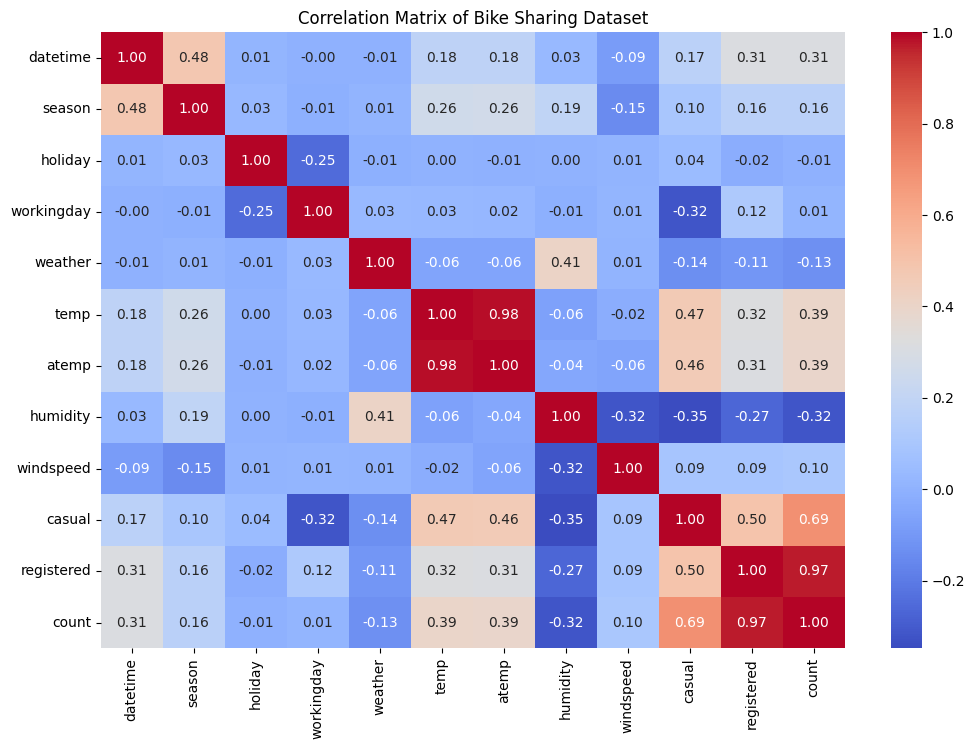

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bike Sharing Dataset')
plt.show()

#####Insights:

* 'temp' and 'atemp': These two variables are highly correlated, which makes sense because they both measure temperature but in different ways (one is actual temperature and the other is "feels like" temperature).

* 'casual' and 'count': High positive correlation, indicating that the number of casual riders significantly contributes to the total count of riders.
* 'registered' and 'count': Similarly, the number of registered riders also has a high positive correlation with the total count of riders.

Since temp and atemp are highly correlated, we can remove one of them to avoid redundancy in the model.



####ii. Remove the highly correlated variables, if any.

In [ ]:
#Removing the highly correlated variables.
df_reduced = df_copy.drop(columns=['atemp'])

# Display the columns of the reduced DataFrame to confirm
print(df_reduced.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


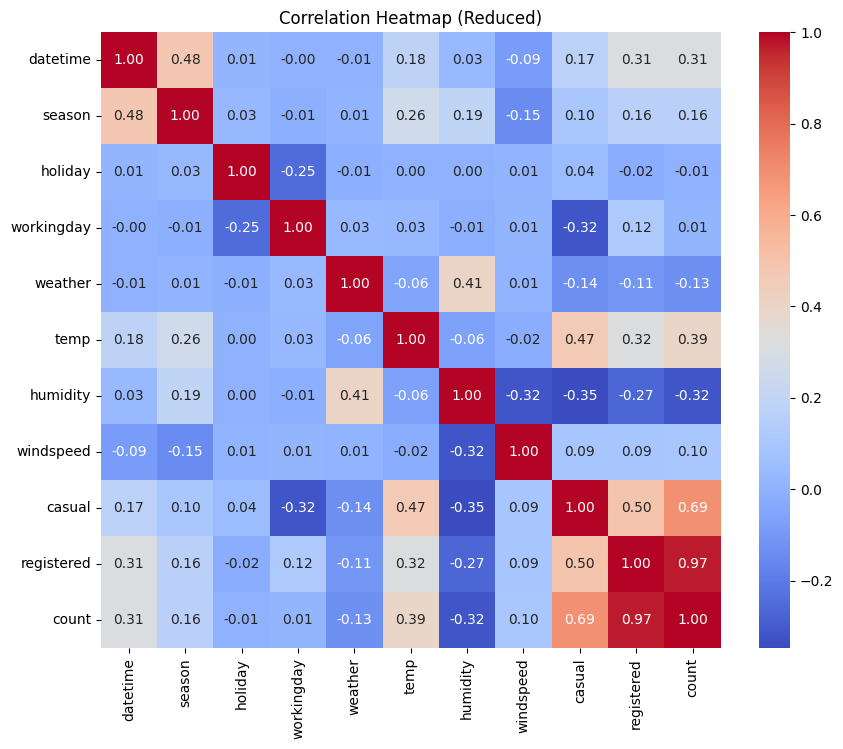

In [ ]:
# Compute the correlation matrix for the reduced DataFrame
corr_matrix_reduced = df_reduced.corr()

# Plot the heatmap for the reduced DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Reduced)')
plt.show()

In [ ]:
df.drop(columns=['atemp'])

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,"Clear,Few_cloud",9.84,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,0,0,"Clear,Few_cloud",9.02,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,0,0,"Clear,Few_cloud",9.02,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,0,0,"Clear,Few_cloud",9.84,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,0,0,"Clear,Few_cloud",9.84,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,"Clear,Few_cloud",15.58,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,0,1,"Clear,Few_cloud",14.76,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,0,1,"Clear,Few_cloud",13.94,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,0,1,"Clear,Few_cloud",13.94,61,6.0032,12,117,129


##Step 3: Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?.

#####a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

Define the Hypotheses:

Null Hypothesis (H0): There is no significant difference in the number of bike rides between weekdays and weekends.

Alternative Hypothesis (H1): There is a significant difference in the number of bike rides between weekdays and weekends.

In [ ]:
#Define the Hypotheses:
#Null Hypothesis (H0): There is no significant difference in the number of bike rides between weekdays and weekends.
#Alternative Hypothesis (H1): There is a significant difference in the number of bike rides between weekdays and weekends.

#####b. Select an appropriate test -

Given that there are two independent sample groups, we can opt for an independent samples T-test, provided the groups adhere to a normal or Gaussian distribution.



The assumptions for the 2-Sample T-Test are:

Independence: The observations in each group must be independent of each other.

Normality: The data within each group should follow a normal distribution. If the sample sizes are large (typically >30), the test is robust to deviations from normality due to the Central Limit Theorem.

Equal Variances (Homogeneity of Variances): The variances of the populations from which the samples are taken should be equal. If the variances are not equal, a modified version of the T-test (Welch's T-test) can be used instead.

These assumptions ensure the validity and reliability of the T-test results.

#####c. Set a significance level

In [ ]:
alpha=0.05

In [ ]:
# Identifying the number of working day and weekends.
df['workingday'].value_counts()


workingday
1    7234
0    3404
Name: count, dtype: int64

In [ ]:
# Calculating total number of working day and weekends.
workingday=df[df['workingday']==1]['count']
workingday

47         5
48         2
49         1
50         3
51        30
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7234, dtype: int64

In [ ]:
weekend=df[df['workingday']==0]['count']
weekend

0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: count, Length: 3404, dtype: int64

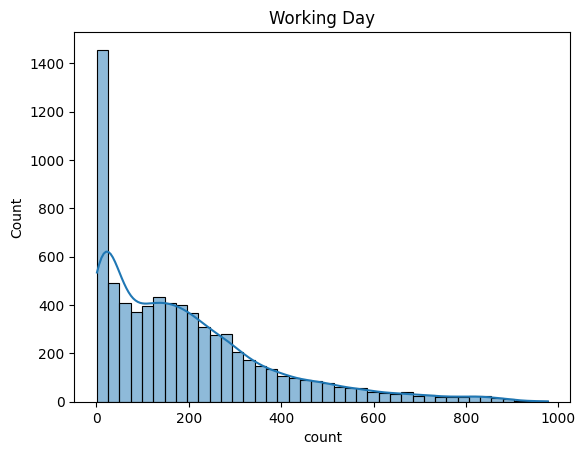

In [ ]:
#Normality checks
# Check the histplots for both the groups
# Histplot for working day group
sns.histplot(workingday,kde=True)
plt.title('Working Day')
plt.show()


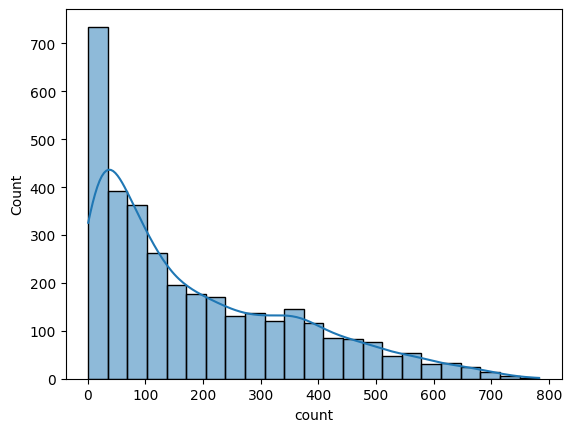

In [ ]:
# Histplot for non working day group
sns.histplot(weekend,kde=True)
plt.show()


Insights: Insights from the histogram reveal that the usage data for both working days and non-working days exhibit a right-skewed distribution

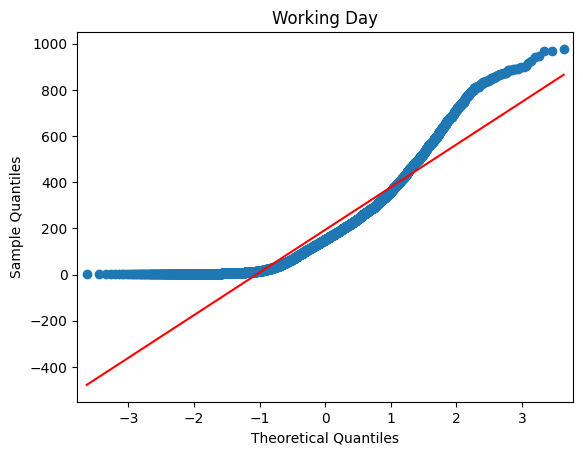

In [ ]:
# QQ plots for both the working day and non woring day group
import statsmodels.api as sm
sm.qqplot(workingday,line='s')
plt.title('Working Day')
plt.show()

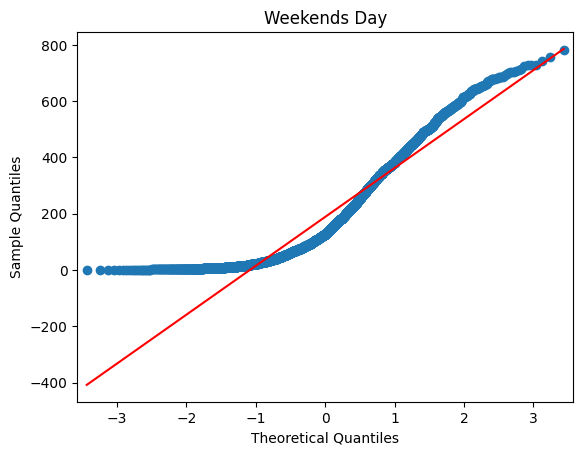

In [ ]:
#QQ plot for the weekend day group
sm.qqplot(weekend,line='s')
plt.title('Weekends Day')
plt.show()


Insights: Insights from the QQ plots show that the usage data for both working days and non-working days are not normally distributed

In [ ]:
# Shapiro-Wilk test for both the sample groups
#Null Hypothesis -- Ho -- Data is normally distributed
#Alternate Hypothesis -- Ha -- Data is not normally distributed
alpha=0.05


In [ ]:
np.random.seed(10)
# sample size of 200 taken from the workingday data for the Shapiro test
workingday_sample=workingday.sample(200)
workingday_sample.head()

5894    335
8981    248
8432    795
3811    349
4896      5
Name: count, dtype: int64

In [ ]:
np.random.seed(10)
# sample size of 200 taken from the weekend day group for the Shapiro test
weekendday_sample=weekend.sample(200)
weekendday_sample.head()

5459    151
3670    219
4426    377
3274    121
872      59
Name: count, dtype: int64

In [ ]:
from scipy.stats import shapiro
#Shapiro test for workingday
test_stat_working_day,p_value_working_day=shapiro(workingday_sample)
print(test_stat_working_day,p_value_working_day)
if p_value_working_day< alpha:
  print(f'p-value working day is {p_value_working_day}, Reject null hypotheses-Working day count data is not normally distributed')
else:
  print(f'p-value working day is {p_value_working_day}, Accept null hypothesis-Working day count data is normally distributed')

0.8744110465049744 7.78240753090964e-12
p-value working day is 7.78240753090964e-12, Reject null hypotheses-Working day count data is not normally distributed


In [ ]:
test_stat_weekend_day,p_value_weekend_day=shapiro(weekendday_sample)
print(test_stat_weekend_day,p_value_weekend_day)
if p_value_weekend_day< alpha:
  print(f'p-value weekend day is {p_value_weekend_day}, Reject null hypotheses-weekend day count data is not normally distributed')
else:
  print(f'p-value weekend day is {p_value_weekend_day}, Accept null hypothesis-weekend day count data is normally distributed')

0.8794119954109192 1.475051851496101e-11
p-value weekend day is 1.475051851496101e-11, Reject null hypotheses-weekend day count data is not normally distributed


#####Identifying the correct test-

Since both the groups dont follow normal distribution, T-Test cannot be applied here, we will do the hypothesis testing by non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

#####d. Calculate test Statistics / p-value

In [ ]:
from scipy.stats import mannwhitneyu
# Since, the sample size required for mann whitney test is small,
# we will take the 200 size subsets from both the groups, in the test data
mann_test_stat,mann_p_value = mannwhitneyu(workingday_sample,weekendday_sample,alternative='two-sided')
print(mann_test_stat,mann_p_value)

20397.0 0.7316294774549887


#####e. Decide whether to accept or reject the Null Hypothesis.

In [ ]:
if mann_p_value< alpha:
  print(f'p-value is {mann_p_value}, Reject null hypothesis. There is significant difference in the number of bike rides between weekdays and weekends.')
else:
  print(f'p-value is {mann_p_value}, Accept null hypothesis. There is no significant difference in the number of bike rides between weekdays and weekends.')

p-value is 0.7316294774549887, Accept null hypothesis. There is no significant difference in the number of bike rides between weekdays and weekends.


In [ ]:
#Checking by independent group T test as well
from scipy.stats import ttest_ind
ttest_stat,ttest_p_value=ttest_ind(workingday,weekend,alternative='two-sided')
print(ttest_stat,ttest_p_value)

1.229724557044485 0.21882746848482007


#####e. Decide whether to accept or reject the Null Hypothesis

In [ ]:
if ttest_p_value< alpha:
  print(f'p-value is {ttest_p_value}, Reject null hypothesis. There is significant difference in the number of bike rides between weekdays and weekends.')
else:
  print(f'p-value is {ttest_p_value}, Accept null hypothesis. There is no significant difference in the number of bike rides between weekdays and weekends.')

p-value is 0.21882746848482007, Accept null hypothesis. There is no significant difference in the number of bike rides between weekdays and weekends.


#####f. Draw inferences & conclusions from the analysis and provide recommendations.


Insights: ’Insight from hypothesis testing of working day and weekend day usage count.
There is no significant difference in the number of bike rides between weekdays and weekends., which is confirmed.

Recommendation Based on Working and weekend Day Usage:

To increase the usage count on working days, we recommend enhancing customer awareness and implementing promotional activities. Given the higher potential for ridership on working days, these efforts should focus on encouraging more riders during this period.


##Step 4: Check if the demand of bicycles on rent is the same for different Weather conditions?


#####a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

Null Hypothesis (H0):

There is no significant difference in the average number of bike rentals (count) across different weather conditions.

Alternative Hypothesis (H1):

There is a significant difference in the average number of bike rentals (count) across different weather conditions.

In [ ]:
#Defining Hypotheses.

#Null Hypothesis (H0): There is no significant difference in the average number of bike rentals (count) across different weather conditions.

#Alternative Hypothesis (H1): There is a significant difference in the average number of bike rentals (count) across different weather conditions.

#####b. Select an appropriate test -

In [ ]:
df['weather'].value_counts()

weather
Clear,Few_cloud                7039
Mist+Cloudy,Mist+Few_clouds    2793
Light_Snow,Light_Rain           805
Heavy_Rain,Snow+Fog               1
Name: count, dtype: int64

Since there are more than 2 independent sample groups involved, we may plan to go with 1 way Anova test,
provided the groups follow normal/gaussian distribution and variance of all groups is same”

In [ ]:
df['weather'].value_counts()

weather
Clear,Few_cloud                7039
Mist+Cloudy,Mist+Few_clouds    2793
Light_Snow,Light_Rain           805
Heavy_Rain,Snow+Fog               1
Name: count, dtype: int64

In [ ]:
#defining sample groups for wheather separately.
weather_grp1=df[df['weather']=='Clear,Few_cloud']['count']
weather_grp2=df[df['weather']=='Mist+Cloudy,Mist+Few_clouds']['count']
weather_grp3=df[df['weather']=='Light_Snow,Light_Rain']['count']
weather_grp4=df[df['weather']=='Heavy_Rain,Snow+Fog']['count']

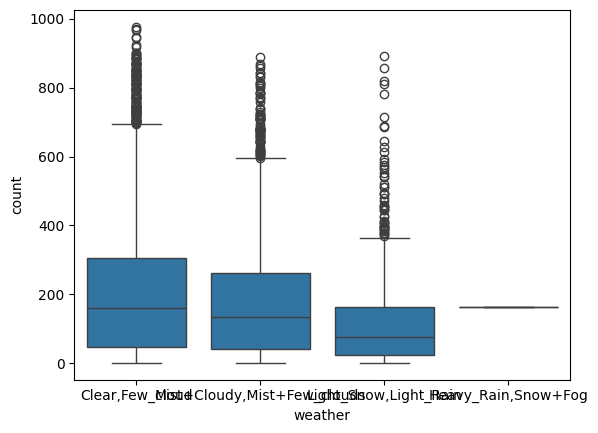

In [ ]:
sns.boxplot(data=df,x='weather',y='count')
plt.show()

Insight:

The count usage seems higher for the weather group 1 as compared to other weather groups.

#####c. Check assumptions of the test

#####c.i.Checking normality

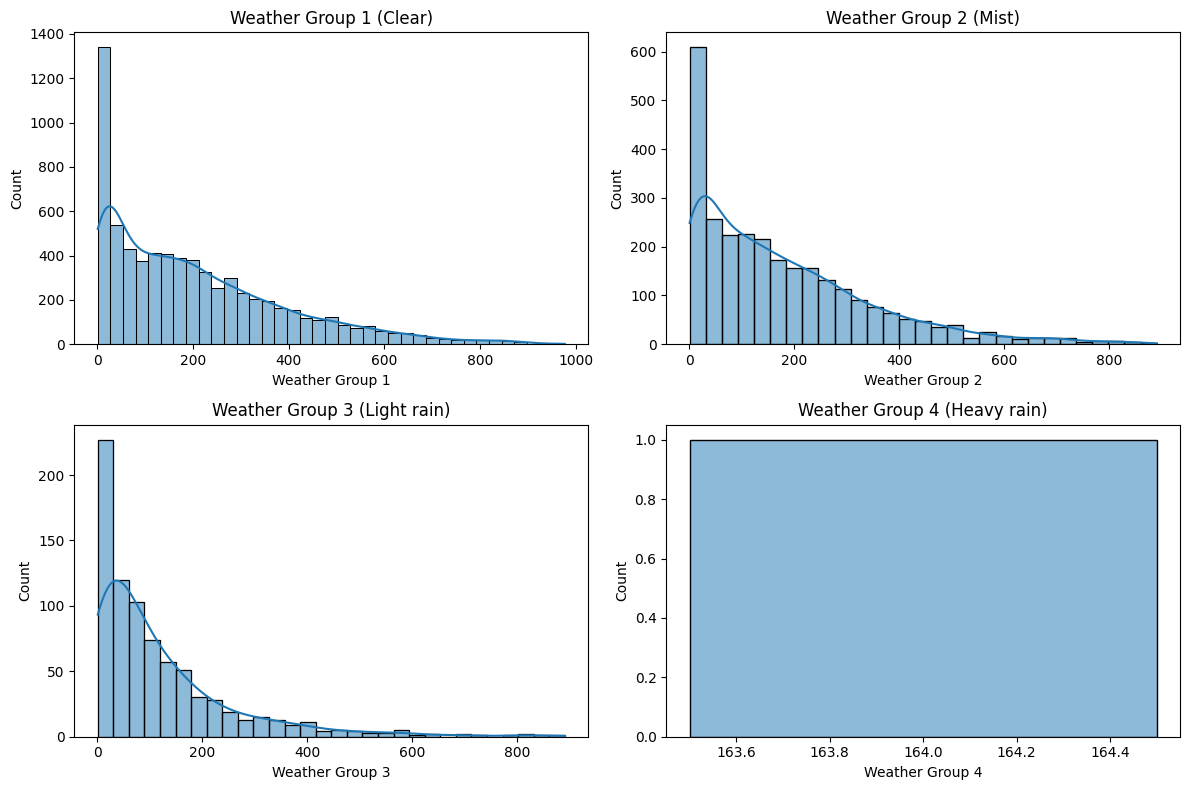

In [ ]:
#Checking by using histplots for all 4 weather groups.
# Plot histograms
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(weather_grp1,kde=True)
#plt.hist(weather_grp1, bins=10, alpha=0.7, color='blue')
plt.title('Weather Group 1 (Clear)')
plt.xlabel('Weather Group 1')

plt.subplot(2, 2, 2)
sns.histplot(weather_grp2,kde=True)
#plt.hist(weather_grp2, bins=10, alpha=0.7, color='green')
plt.title('Weather Group 2 (Mist)')
plt.xlabel('Weather Group 2')

plt.subplot(2, 2, 3)
sns.histplot(weather_grp3,kde=True)
#plt.hist(weather_grp3, bins=10, alpha=0.7, color='red')
plt.title('Weather Group 3 (Light rain)')
plt.xlabel('Weather Group 3')

plt.subplot(2, 2, 4)
sns.histplot(weather_grp4,kde=True)
#plt.hist(weather_grp4, bins=10, alpha=0.7, color='red')
plt.title('Weather Group 4 (Heavy rain)')
plt.xlabel('Weather Group 4')

plt.tight_layout()
plt.show()


Insights:

From the weather group count usage histplots we can see, all the weather groups are right skewed.


<Figure size 1200x800 with 0 Axes>

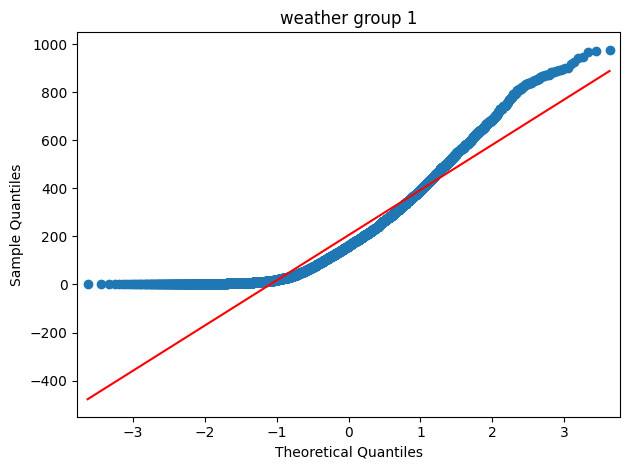

In [ ]:
#QQ plots for weather group 1, weather group 2 and weather group 3.
import statsmodels.api as sm
# QQ plot for the weather group 1.
plt.figure(figsize=(12, 8))
sm.qqplot(weather_grp1, line="s")
plt.title('weather group 1')
plt.tight_layout()
plt.show()

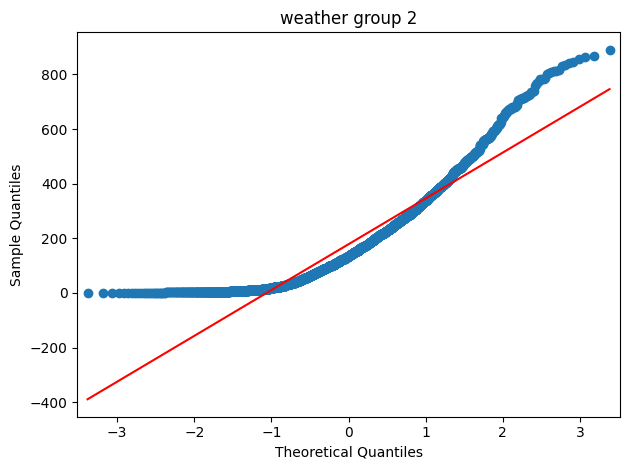

In [ ]:
# QQ plot for the weather group 2.
sm.qqplot(weather_grp2, line="s")
plt.title('weather group 2')
plt.tight_layout()
plt.show()

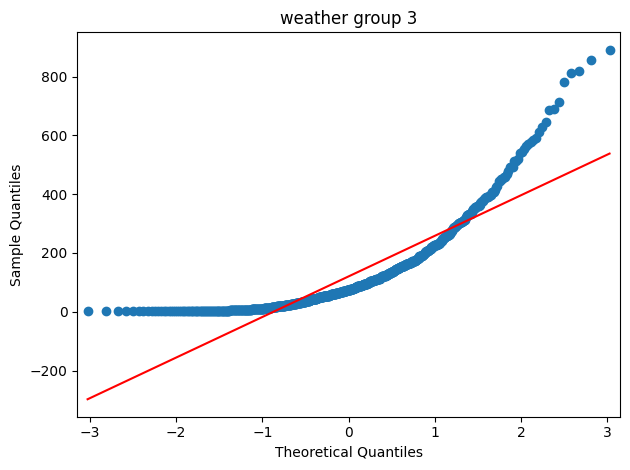

In [ ]:
# QQ plot for the weather group 3
sm.qqplot(weather_grp3, line="s")
plt.title('weather group 3')
plt.tight_layout()
plt.show()

Insight:

From Weather group QQ plots, we can see that the usage data count for all the weather groups is not normally
distributed.

 (Weather group 4 not considered, as it has only 1
entry)

####Shapiro-Wilk test for weather groups 1, 2 and 3 (Weather group 4 not considered, as it has only 1 entry)

In [ ]:
# Shapiro-Wilk test for weather groups 1,2 and 3.
#Null Hypothesis(Ho): Sample data is normally distributed
#Alternate Hypothesis(Ha): Sample data is not normally distributed
alpha=0.05

In [ ]:
np.random.seed(11)
# sample size of 200 taken from the each weather group 1 data for the Shapiro test.
weather_grp1_sample=weather_grp1.sample(200)
weather_grp1_sample.head()

4967      10
7049       4
10550     44
2752     375
5179     140
Name: count, dtype: int64

In [ ]:
# sample size of 200 taken from the each weather group 2 data for the Shapiro test.
weather_grp2_sample=weather_grp2.sample(200)
weather_grp2_sample.head()

4861    191
6703    202
1246    237
2744      3
6535    224
Name: count, dtype: int64

In [ ]:
# sample size of 200 taken from the each weather group 3 data for the Shapiro test.
weather_grp3_sample=weather_grp3.sample(200)
weather_grp3_sample.head()

8108     23
5096     50
6524     11
4073    140
8867    160
Name: count, dtype: int64

In [ ]:
#Shapiro test for weather group 1
test_stat_weather_grp1,p_value_weather_grp1=shapiro(weather_grp1_sample)
print(test_stat_weather_grp1,p_value_weather_grp1)
if p_value_weather_grp1< alpha:
  print(f'p-value weather group 1 is {p_value_weather_grp1}, Reject null hypotheses-weather group 1 sample data is not normally distributed')
else:
  print(f'p-value weather group 1 is {p_value_weather_grp1}, Accept null hypothesis-weather group 1 sample data is normally distributed')

0.8709883093833923 5.073512790443324e-12
p-value weather group 1 is 5.073512790443324e-12, Reject null hypotheses-weather group 1 sample data is not normally distributed


In [ ]:
#Shapiro test for weather group 2
test_stat_weather_grp2,p_value_weather_grp2=shapiro(weather_grp2_sample)
print(test_stat_weather_grp2,p_value_weather_grp2)
if p_value_weather_grp2< alpha:
  print(f'p-value weather group 2 is {p_value_weather_grp2}, Reject null hypotheses-weather group 2 sample data is not normally distributed')
else:
  print(f'p-value weather group 2 is {p_value_weather_grp2}, Accept null hypothesis-weather group 2 sample data is normally distributed')

0.8670567274093628 3.132906911326727e-12
p-value weather group 2 is 3.132906911326727e-12, Reject null hypotheses-weather group 2 sample data is not normally distributed


In [ ]:
#Shapiro test for weather group 3
test_stat_weather_grp3,p_value_weather_grp3=shapiro(weather_grp3_sample)
print(test_stat_weather_grp3,p_value_weather_grp3)
if p_value_weather_grp3< alpha:
  print(f'p-value weather group 3 is {p_value_weather_grp3}, Reject null hypotheses-weather group 3 sample data is not normally distributed')
else:
  print(f'p-value weather group 3 is {p_value_weather_grp3}, Accept null hypothesis-weather group 3 sample data is normally distributed')

0.810035765171051 7.0926625710858796e-15
p-value weather group 3 is 7.0926625710858796e-15, Reject null hypotheses-weather group 3 sample data is not normally distributed


#####c.ii. Equality Variance.


Using Levene test for variance to Check all weather groups 1,2,3 have same variance or not. (Weather group 4 not considered, as it has
only 1 entry )

In [ ]:
#Defining Hypotheses.
#Null Hypothesis(H0): All groups have same variance.
#Alternate Hypothesis(Ha): Atleast one of the group's variance is different from other groups.
alpha=0.05

In [ ]:
from scipy.stats import levene
lev_stat,lev_p_value=levene(weather_grp1,weather_grp2,weather_grp3)
if lev_p_value< alpha:
  print(f'p-value is {lev_p_value}, Reject null hypothesis. Atleast one of the group''s variance is different from other groups')
else:
  print(f'p-value is {lev_p_value}, Accept null hypothesis. All groups have same variance.')


p-value is 1.2978529104303977e-35, Reject null hypothesis. Atleast one of the groups variance is different from other groups


#####Identifying the correct test-

Since none of the three weather groups follow a normal distribution and their variances differ, we will conduct hypothesis testing using the Kruskal-Wallis Test

d. Set a significance level and Calculate the test Statistics / p-value.

In [ ]:
from scipy.stats import kruskal
alpha=0.05
k_test_stat,k_p_value=kruskal(weather_grp1,weather_grp2,weather_grp3)
print(k_test_stat,k_p_value)

184.69060114836876 7.851371568008475e-41


#####e. Decide whether to accept or reject the Null Hypothesis

In [ ]:
if k_p_value< alpha:
  print(f'p-value is {k_p_value}, Reject null hypothesis. There is a significant difference in the average number of bike rentals (count) across different weather conditions.')
else:
  print(f'p-value is {k_p_value}, Accept null hypothesis. There is not a significant difference in the average number of bike rentals (count) across different weather conditions.')

p-value is 7.851371568008475e-41, Reject null hypothesis. There is a significant difference in the average number of bike rentals (count) across different weather conditions.


#####f. Draw inferences & conclusions from the analysis and provide recommendations

Insights:

The hypothesis testing confirmed that usage varies across different weather conditions. Additionally, the box plots reveal that usage is highest under weather group 1(i.e when the wheather is Clear, Few clouds, partly cloudy, partly cloudy).

Recommendation for Usage Pattern Based on Weather:

Given that usage is highest under weather group 1(i.e when the wheather is Clear, Few clouds, partly cloudy, partly cloudy), it is advisable to maintain the current level of services during this period to ensure consistent usage. For other weather conditions, consider introducing offers or discounts to boost usage.

##Step 5: Check if the demand of bicycles on rent is the same for different Seasons?

#####a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)


Null Hypothesis (H0): There is no significant difference in the demand for bicycles on rent across different seasons.
H0: μ(spring)=μ(summer)=μ(fall)=μ(winter)

Alternate Hypothesis (H1): There is a significant difference in the demand for bicycles on rent across different seasons.
H1: At least one season has a different mean demand.

In [ ]:
#Defining hypotheses.

#Null Hypothesis (H0): There is no significant difference in the demand for bicycles on rent across different seasons.

#Alternate Hypothesis (H1): There is a significant difference in the demand for bicycles on rent across different seasons(At least one season has a different mean demand).

#####b. Select an appropriate test -

In [ ]:
df['season'].value_counts()

season
winter    2711
fall      2708
summer    2674
spring    2545
Name: count, dtype: int64

Since there are more than 2 independent sample groups involved, we may plan to go with 1 way Anova test, provided the groups follow normal/gaussian distribution and variance of all groups is same.

In [ ]:
#defining sample groups for season separately.
winter_season_grp=df[df['season']=='winter']['count']
fall_season_grp=df[df['season']=='fall']['count']
summer_season_grp=df[df['season']=='summer']['count']
spring_season_grp=df[df['season']=='spring']['count']

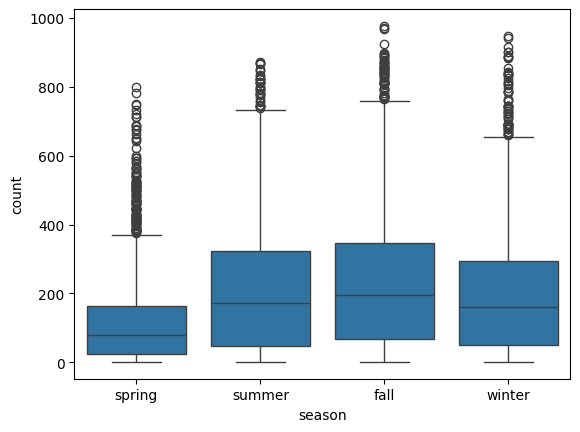

In [ ]:
sns.boxplot(data=df,x='season',y='count')
plt.show()


Insight from Boxplot Analysis:


The boxplot indicates that bicycle usage is highest in Season 'fall' compared to other seasons. This observation will be further validated through hypothesis testing.

#####c. Check assumptions of the test

#####c. i. Normality check

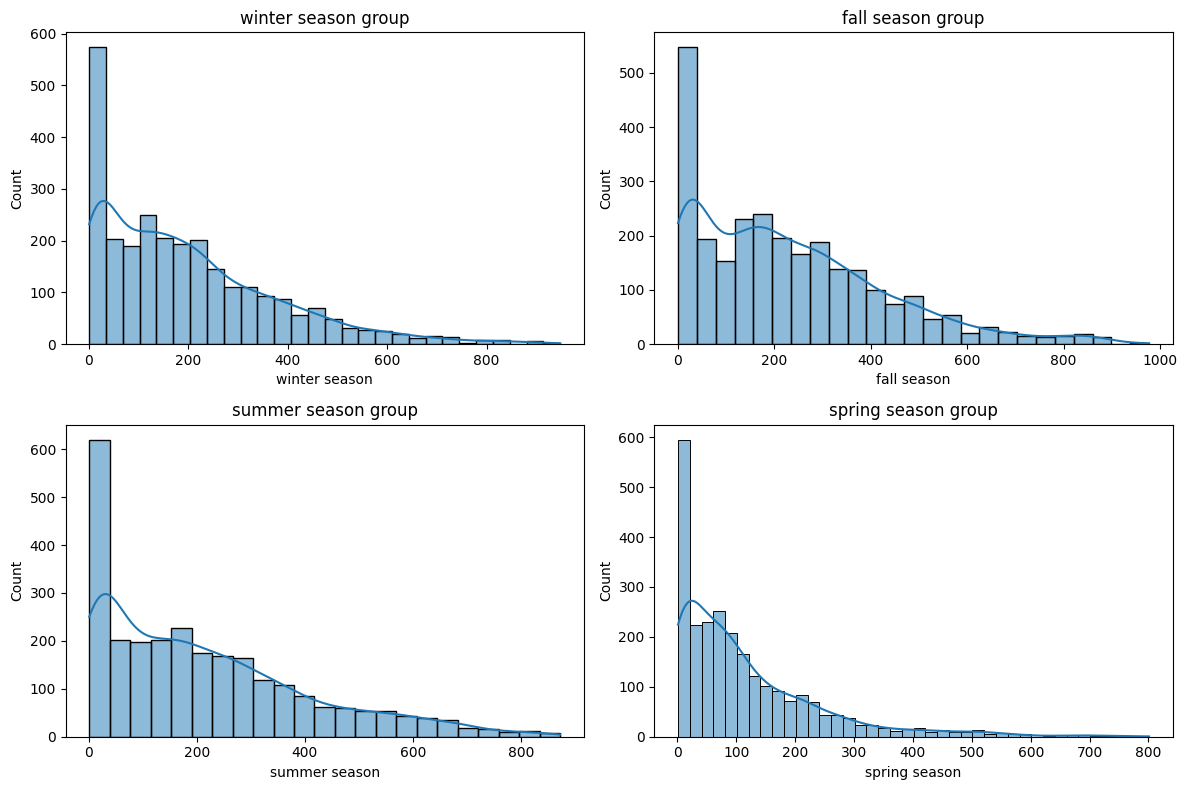

In [ ]:
#Checking by using histplots for all 4 seasons groups.
# Plot histograms
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(winter_season_grp,kde=True)
plt.title('winter season group')
plt.xlabel('winter season')

plt.subplot(2, 2, 2)
sns.histplot(fall_season_grp,kde=True)
plt.title('fall season group')
plt.xlabel('fall season')

plt.subplot(2, 2, 3)
sns.histplot(summer_season_grp,kde=True)
plt.title('summer season group')
plt.xlabel('summer season')

plt.subplot(2, 2, 4)
sns.histplot(spring_season_grp,kde=True)
plt.title('spring season group')
plt.xlabel('spring season')

plt.tight_layout()
plt.show()



Insights:

From the histplots of usage pattern as per the season we can see all the data are right skewed.

<Figure size 1200x800 with 0 Axes>

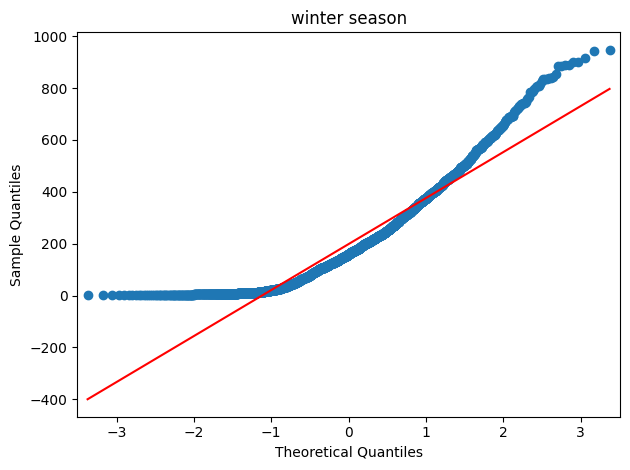

In [ ]:
#QQ plots for winter season group, fall season group, summer season group and spring season group.
import statsmodels.api as sm
# QQ plot for the winter season group.
plt.figure(figsize=(12, 8))
sm.qqplot(winter_season_grp, line="s")
plt.title('winter season')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

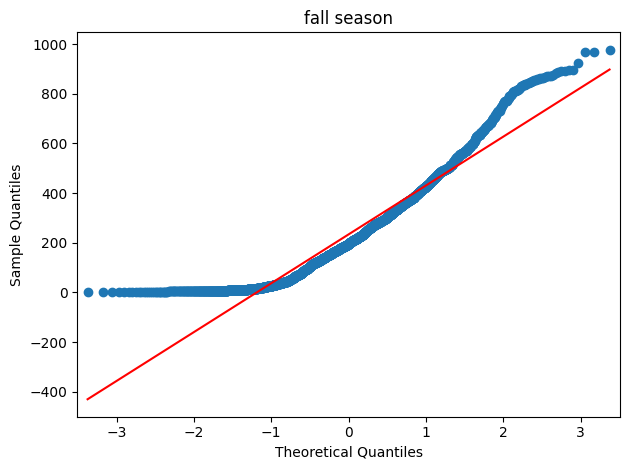

In [ ]:
# QQ plot for the fall season group.
plt.figure(figsize=(12, 8))
sm.qqplot(fall_season_grp, line="s")
plt.title('fall season')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

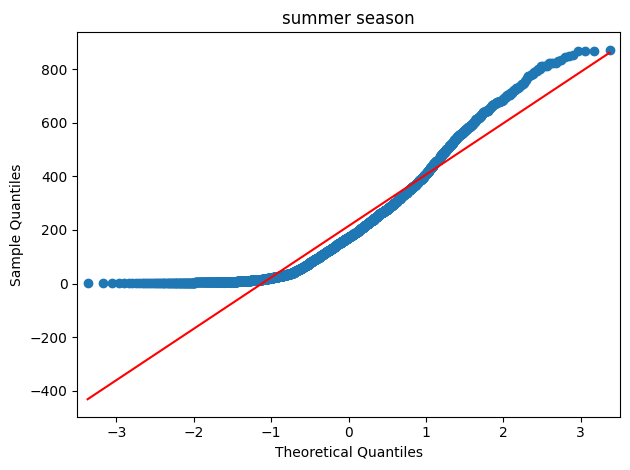

In [ ]:
# QQ plot for the summer season group.
plt.figure(figsize=(12, 8))
sm.qqplot(summer_season_grp, line="s")
plt.title('summer season')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

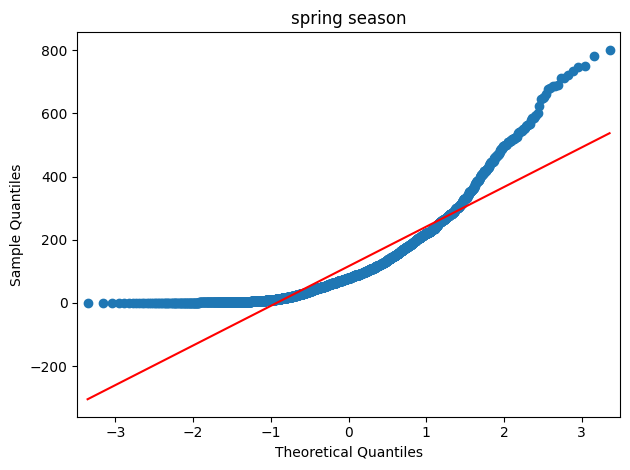

In [ ]:
# QQ plot for the spring season group.
plt.figure(figsize=(12, 8))
sm.qqplot(spring_season_grp, line="s")
plt.title('spring season')
plt.tight_layout()
plt.show()

Insight:

From season group QQ plots, we can see that the usage data count for all the season groups is not normally distributed.

####Shapiro-Wilk test for winter season group, fall season group, summer season group and spring season group.

In [ ]:
# Shapiro-Wilk test for winter season group, fall season group, summer season group and spring season group.
#Null Hypothesis(Ho): Sample data is normally distributed
#Alternate Hypothesis(Ha): Sample data is not normally distributed
alpha=0.05

In [ ]:
np.random.seed(12)
# sample size of 200 taken from the winter season group data for the Shapiro test.
winter_season_grp_sample=winter_season_grp.sample(200)
winter_season_grp_sample.head()

10047    102
4331      62
5311     280
4282     322
4187     226
Name: count, dtype: int64

In [ ]:
# sample size of 200 taken from the fall season group data for the Shapiro test.
fall_season_grp_sample=fall_season_grp.sample(200)
fall_season_grp_sample.head()

9281     17
3672    162
3688    361
3166    305
2825    185
Name: count, dtype: int64

In [ ]:
# sample size of 200 taken from the summer season group data for the Shapiro test.
summer_season_grp_sample=summer_season_grp.sample(200)
summer_season_grp_sample.head()

6950    182
1921    120
2466    285
2245    112
7861    228
Name: count, dtype: int64

In [ ]:
# sample size of 200 taken from the spring season group data for the Shapiro test.
spring_season_grp_sample=spring_season_grp.sample(200)
spring_season_grp_sample.head()

213       3
6103    192
6589    171
5871    191
6148     91
Name: count, dtype: int64

In [ ]:
#Shapiro test for winter season group
test_stat_winter_season_grp,p_value_winter_season_grp=shapiro(winter_season_grp_sample)
print(test_stat_winter_season_grp,p_value_winter_season_grp)
if p_value_winter_season_grp< alpha:
  print(f'p-value winter season group is {p_value_winter_season_grp}, Reject null hypotheses-winter season group sample data is not normally distributed')
else:
  print(f'p-value winter season group is {p_value_winter_season_grp}, Accept null hypothesis-winter season group sample data is normally distributed')

0.8837079405784607 2.5916040147233588e-11
p-value winter season group is 2.5916040147233588e-11, Reject null hypotheses-winter season group sample data is not normally distributed


In [ ]:
#Shapiro test for fall season group
test_stat_fall_season_grp,p_value_fall_season_grp=shapiro(fall_season_grp_sample)
print(test_stat_fall_season_grp,p_value_fall_season_grp)
if p_value_fall_season_grp< alpha:
  print(f'p-value fall season group is {p_value_fall_season_grp}, Reject null hypotheses-fall season group sample data is not normally distributed')
else:
  print(f'p-value fall season group is {p_value_fall_season_grp}, Accept null hypothesis-fall season group sample data is normally distributed')

0.9085381627082825 9.10878483750821e-10
p-value fall season group is 9.10878483750821e-10, Reject null hypotheses-fall season group sample data is not normally distributed


In [ ]:
#Shapiro test for summer season group
test_stat_summer_season_grp,p_value_summer_season_grp=shapiro(summer_season_grp_sample)
print(test_stat_summer_season_grp,p_value_summer_season_grp)
if p_value_summer_season_grp< alpha:
  print(f'p-value summer season group is {p_value_summer_season_grp}, Reject null hypotheses-summer season group sample data is not normally distributed')
else:
  print(f'p-value summer season group is {p_value_summer_season_grp}, Accept null hypothesis-summer season group sample data is normally distributed')

0.8986846208572388 2.0738394335140242e-10
p-value summer season group is 2.0738394335140242e-10, Reject null hypotheses-summer season group sample data is not normally distributed


In [ ]:
#Shapiro test for spring season group
test_stat_spring_season_grp,p_value_spring_season_grp=shapiro(spring_season_grp_sample)
print(test_stat_spring_season_grp,p_value_spring_season_grp)
if p_value_spring_season_grp< alpha:
  print(f'p-value spring season group is {p_value_spring_season_grp}, Reject null hypotheses-spring season group sample data is not normally distributed')
else:
  print(f'p-value spring season group is {p_value_spring_season_grp}, Accept null hypothesis-spring season group sample data is normally distributed')

0.7172592878341675 3.66222883833461e-18
p-value spring season group is 3.66222883833461e-18, Reject null hypotheses-spring season group sample data is not normally distributed


#####c. ii. Equality Variance

Using Levene test for variance to Check all season groups have same variance or not.

In [ ]:
#Defining Hypotheses.
#Null Hypothesis(H0): All groups have same variance.
#Alternate Hypothesis(Ha): Atleast one of the group's variance is different from other groups.
alpha=0.05

In [ ]:
from scipy.stats import levene
lev_season_stat,lev_season_p_value=levene(winter_season_grp, fall_season_grp,summer_season_grp, spring_season_grp)
if lev_season_p_value< alpha:
  print(f'p-value is {lev_season_p_value}, Reject null hypothesis. Atleast one of the group''s variance is different from other groups')
else:
  print(f'p-value is {lev_season_p_value}, Accept null hypothesis. All groups have same variance.')

p-value is 6.845368745031607e-114, Reject null hypothesis. Atleast one of the groups variance is different from other groups


#####Identifying the correct test-

Since none of the three weather groups follow a normal distribution and their variances differ, we will conduct hypothesis testing using the Kruskal-Wallis Test

In [ ]:
from scipy.stats import kruskal
alpha=0.05
k_test_stat_season,k_p_value_season=kruskal(winter_season_grp, fall_season_grp,summer_season_grp, spring_season_grp)
print(k_test_stat_season,k_p_value_season)

664.008132882048 1.3370428160922689e-143


In [ ]:
if k_p_value_season< alpha:
  print(f'p-value is {k_p_value_season}, Reject null hypothesis.There is a significant difference in the demand for bicycles on rent across different seasons')
else:
  print(f'p-value is {k_p_value_season}, Accept null hypothesis. There is no significant difference in the demand for bicycles on rent across different seasons')

p-value is 1.3370428160922689e-143, Reject null hypothesis.There is a significant difference in the demand for bicycles on rent across different seasons


#####f. Draw inferences & conclusions from the analysis and provide recommendations.


Insights:

Hypothesis testing confirmed that bicycle usage varies significantly across different seasons. Additionally, the boxplots show that usage is highest in 'fall' Season.

Recommendations:


Given that usage is highest in 'fall', it is advisable to maintain the current level of services to sustain this high demand. For other seasons, consider introducing offers or discounts to boost usage.

##Step 6: Check if the Weather conditions are significantly different during different Seasons?

#####a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)


Null Hypothesis (H0): Weather conditions are not significantly different across different seasons(Weather and seasons are independent).

Alternate Hypothesis (H1): Weather conditions are significantly different across different seasons(Weather and seasons are dependent).

In [ ]:
#defining hypotheses.
#Null Hypothesis (H0): Weather conditions are not significantly different across different seasons.
#Alternate Hypothesis (H1): Weather conditions are significantly different across different seasons.

#####b. Select an appropriate test -

Since this is category to category comaparison, we will use Chi-square test of independence.

The Chi-square statistic is a non-parametric (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data.


#####c. Create a Contingency Table against ‘Weather’ & ‘Season’ columns

In [ ]:
#Preparing the contingency table for both the categories.
contingency_table = pd.crosstab(df['weather'],df['season'])
print(contingency_table)

season                       fall  spring  summer  winter
weather                                                  
Clear,Few_cloud              1921    1662    1764    1692
Heavy_Rain,Snow+Fog             0       1       0       0
Light_Snow,Light_Rain         188     185     214     218
Mist+Cloudy,Mist+Few_clouds   599     697     696     801


#####d. Set a significance level and Calculate the test Statistics / p-value.

In [ ]:
from scipy.stats import chi2_contingency
alpha=0.05
chi_stat,chi_p_value,df,exp_freq = chi2_contingency(contingency_table)
print(chi_stat,chi_p_value,df,exp_freq)

51.863924572167576 4.796185240220626e-08 9 [[1.79184170e+03 1.68398712e+03 1.76934443e+03 1.79382675e+03]
 [2.54559128e-01 2.39236699e-01 2.51363038e-01 2.54841136e-01]
 [2.04920098e+02 1.92585542e+02 2.02347246e+02 2.05147114e+02]
 [7.10983644e+02 6.68188099e+02 7.02056966e+02 7.11771292e+02]]


#####e. Decide whether to accept or reject the Null Hypothesis.

In [ ]:
if chi_p_value< alpha:
  print(f'p-value is {chi_p_value}, Reject null hypothesis. Weather conditions are significantly different across different seasons')
else:
  print(f'p-value is {chi_p_value}, Accept null hypothesis. Weather conditions are not significantly different across different seasons')

p-value is 4.796185240220626e-08, Reject null hypothesis. Weather conditions are significantly different across different seasons


#####f. Draw inferences & conclusions from the analysis and provide recommendations.

Insights:

The analysis reveals that weather conditions and seasons are dependent. Consequently, strategies tailored for specific weather conditions or seasons will impact both categories

##Business Insights:


###Weather Condition

•	More rentals occur during clear and partly cloudy weather. Data on rentals during extreme weather is limited.


###Seasonal Demand

•	The highest number of bike rentals occurs in the fall and summer, while the lowest is observed in the spring. This insight can guide seasonal marketing and resource allocation.

###Working vs. Non-Working Days


•	The average number of rentals per hour is similar on both working and non-working days, suggesting steady demand throughout the week.


###Weather and Season Dependency


•	There is a significant link between weather and season. Different weather conditions impact rental patterns during different seasons.
Holiday and Working Day Dynamics


•	There are fewer rentals on holidays and weekends, while demand increases on non-working days. Overall, rental counts on working and non-holiday days are similar.


###Correlations


•	There is a strong positive correlation between actual temperature and perceived temperature.


•	Registered users and total riders also show a strong positive correlation.


•	Weather-related factors have a limited correlation with bike rental counts.







##Business Recommendations:


###Seasonal Strategy:


•	Since usage is highest in the fall season, continue providing existing services to maintain high usage during this period.


•	For other seasons, consider introducing offers or discounts to increase usage.


###Weather-Based Strategy:


•	As weather and seasons are interdependent, strategies targeting specific weather conditions or seasons will impact both.

Ensure that promotions or service adjustments take this relationship into account to maximize effectiveness.


###Data-Driven Approach


•	Regularly update and analyze data to adjust strategies based on changing usage patterns and external factors.


•	Use the insights from hypothesis testing to tailor marketing and operational strategies for different weather conditions and seasons.


###Service Enhancement


•	Focus on improving service availability and convenience, especially during high-demand periods (fall season and favorable weather conditions).


•	Consider expanding the fleet or optimizing distribution to meet higher demand efficiently.


###Customer Insights and Reviews


•	Solicit customer feedback to pinpoint areas needing improvement.


•	Leverage feedback insights to tailor services and surpass customer expectations.


###Social Media Strategy


•	Employ social media platforms for targeted promotions and engagement.


•	Highlight varied biking experiences, customer testimonials, and execute focused advertising campaigns.


By implementing these recommendations, Yulu can effectively address the factors influencing the demand for their shared electric cycles and enhance overall user satisfaction and profitability.